# La Liga Football Matches Analysis (Seasons 2022-2023 and 2023-2024)

## Introduction
This notebook presents an analysis of football matches from the Spanish La Liga, one of the premier football leagues in the world, for the seasons 2022-2023 and 2023-2024. 

The data, sourced from Football-Data.co.uk, is stored in a SQLite database.

The primary goal is to predict the outcome of football matches, focusing on whether the home team will win or not, using various match statistics. 

This kind of predictive modeling has applications in areas ranging from sports betting to team strategy development. 

The challenge lies in the dynamic nature of sports data, where numerous factors can influence the outcome of a game.

## Loading the Data

### Background
The journey of this analysis began with the collection of data from Football-Data.co.uk, a comprehensive resource for football statistics. 

This dataset comprises detailed match information from La Liga, encapsulating everything from team names, match dates, scores, to various in-game statistics.

### Data Collection
The data collection involved sourcing match data for two La Liga seasons (2022-2023 and 2023-2024). 

This time frame was selected to capture recent trends and developments in the league, providing a relevant and up-to-date dataset for analysis.

### Data Storage
Upon collection, the data was organized and stored in a SQLite database. 

SQLite was chosen for its simplicity and efficiency in handling structured data, making it an ideal choice for quick querying and analysis. 
The database structure facilitates easy retrieval and manipulation of data, ensuring a smooth workflow for this project.

### Data Retrieval
Now, we proceed to load the data from the SQLite database. The following code connects to the database and retrieves the necessary data, which includes match details like team names, dates, scores, and various statistical measures. 

This data forms the foundation of our predictive analysis, enabling us to delve into the intricacies of La Liga football matches.

In [1]:
import pandas as pd
import sqlite3

# Path to the SQLite database
db_file_path = '/Users/fernandocalle/Desktop/portfolio/la_liga/spanish_la_liga.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_file_path)

# Queries to select data from the 'matches_22_23' and 'matches_23_24' tables
query_22_23 = "SELECT * FROM matches_22_23;"
query_23_24 = "SELECT * FROM matches_23_24;"

# Load the data into DataFrames
matches_22_23_df = pd.read_sql_query(query_22_23, conn)
matches_23_24_df = pd.read_sql_query(query_23_24, conn)

# Concatenating the datasets
matches_df = pd.concat([matches_22_23_df, matches_23_24_df], ignore_index=True)

# Close the database connection
conn.close()

# Display the first few rows of the concatenated DataFrame
matches_df.head()

,match_id,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,1,SP1,12/08/2022,20:00,1,12,2,1,H,1,...,1.52,0.25,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09
1,2,SP1,13/08/2022,16:00,2,11,2,2,D,1,...,1.70,-0.75,2.00,1.90,2.02,1.91,2.06,1.93,2.01,1.86
2,3,SP1,13/08/2022,18:00,3,38,0,3,A,0,...,1.79,0.25,2.02,1.88,2.02,1.91,2.03,1.91,1.98,1.88
3,4,SP1,13/08/2022,20:00,4,24,0,0,D,0,...,2.61,-1.75,1.82,2.08,1.83,2.08,1.86,2.14,1.82,2.06
4,5,SP1,14/08/2022,16:30,5,18,0,1,A,0,...,1.50,0.25,2.05,1.85,2.06,1.87,2.08,1.92,2.00,1.86


In [2]:
matches_df.columns

Index(['match_id', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR', 'HTHG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [3]:
# Reconnect to the SQLite database
conn = sqlite3.connect(db_file_path)

# Reconnect to the SQLite database
conn = sqlite3.connect(db_file_path)

# Read the teams table
teams_query = "SELECT * FROM teams;"
teams_df = pd.read_sql_query(teams_query, conn)

# Read the matches_22_23 table
matches_22_23_query = "SELECT * FROM matches_22_23;"
matches_22_23_df = pd.read_sql_query(matches_22_23_query, conn)

# Read the matches_23_24 table
matches_23_24_query = "SELECT * FROM matches_23_24;"
matches_23_24_df = pd.read_sql_query(matches_23_24_query, conn)

# Concatenate the matches dataframes
matches_df = pd.concat([matches_22_23_df, matches_23_24_df], ignore_index=True)

# Close the database connection
conn.close()

# Merging the matches dataframe with the teams dataframe
# Join for home team
matches_with_home_team = pd.merge(matches_df, teams_df, left_on='HomeTeam', right_on='team_id')
matches_with_home_team = matches_with_home_team.rename(columns={'team_name': 'HomeTeamName'})

# Join for away team
matches_with_teams = pd.merge(matches_with_home_team, teams_df, left_on='AwayTeam', right_on='team_id')
matches_with_teams = matches_with_teams.rename(columns={'team_name': 'AwayTeamName'})

# Dropping the redundant team_id columns
matches_with_teams = matches_with_teams.drop(columns=['team_id_x', 'team_id_y'])

# Display the first few rows of the DataFrame with team names and IDs
matches_with_teams.head()

,match_id,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HomeTeamName,AwayTeamName
0,1,SP1,12/08/2022,20:00,1,12,2,1,H,1,...,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09,Osasuna,Sevilla
1,52,SP1,23/09/2023,15:15,1,12,0,0,D,0,...,2.07,1.83,2.08,1.85,2.17,1.96,2.01,1.85,Osasuna,Sevilla
2,146,SP1,30/12/2022,18:15,2,12,1,1,D,1,...,1.99,1.94,1.98,1.94,2.00,1.99,1.92,1.94,Celta,Sevilla
3,113,SP1,04/11/2023,17:30,2,12,1,1,D,1,...,2.06,1.87,2.08,1.85,2.10,1.88,2.05,1.82,Celta,Sevilla
4,338,SP1,14/05/2023,17:30,3,12,0,3,A,0,...,1.82,2.11,1.79,2.15,1.86,2.15,1.80,2.09,Valladolid,Sevilla


In [4]:
# Load the dataset
data = matches_with_teams

# Display the first few rows of the dataframe
data.head()

,match_id,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HomeTeamName,AwayTeamName
0,1,SP1,12/08/2022,20:00,1,12,2,1,H,1,...,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09,Osasuna,Sevilla
1,52,SP1,23/09/2023,15:15,1,12,0,0,D,0,...,2.07,1.83,2.08,1.85,2.17,1.96,2.01,1.85,Osasuna,Sevilla
2,146,SP1,30/12/2022,18:15,2,12,1,1,D,1,...,1.99,1.94,1.98,1.94,2.00,1.99,1.92,1.94,Celta,Sevilla
3,113,SP1,04/11/2023,17:30,2,12,1,1,D,1,...,2.06,1.87,2.08,1.85,2.10,1.88,2.05,1.82,Celta,Sevilla
4,338,SP1,14/05/2023,17:30,3,12,0,3,A,0,...,1.82,2.11,1.79,2.15,1.86,2.15,1.80,2.09,Valladolid,Sevilla


In [5]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Stats and Data Overview
print('Dataset Summary:')
print(data.describe())
print('\\nData Types:')
print(data.dtypes)
print('\\nMissing Values:')
print(data.isnull().sum())

Dataset Summary:
         match_id    HomeTeam    AwayTeam        FTHG        FTAG        HTHG  \
count  529.000000  529.000000  529.000000  529.000000  529.000000  529.000000   
mean   157.967864   43.338374   47.689981    1.482042    1.098299    0.678639   
std    109.025647  149.091608  158.863442    1.238645    1.045271    0.847644   
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%     67.000000    6.000000    6.000000    1.000000    0.000000    0.000000   
50%    133.000000   11.000000   11.000000    1.000000    1.000000    0.000000   
75%    248.000000   19.000000   19.000000    2.000000    2.000000    1.000000   
max    380.000000  780.000000  780.000000    6.000000    7.000000    4.000000   

             HTAG          HS          AS         HST  ...    AvgC<2.5  \
count  529.000000  529.000000  529.000000  529.000000  ...  529.000000   
mean     0.476371   13.996219   10.731569    4.877127  ...    1.852231   
std      0.701668    4.898591  

## Insights from Visualizations

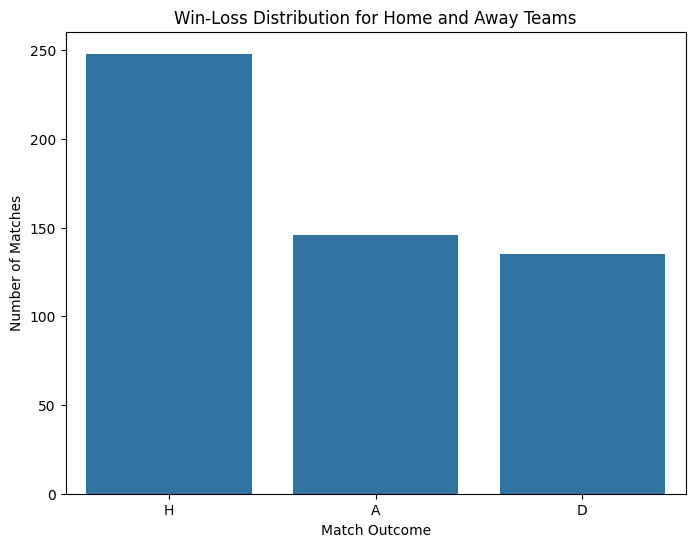

In [6]:
# Assuming 'FTR' column indicates the final match result (H=Home Win, D=Draw, A=Away Win)
win_loss_data = matches_df['FTR'].value_counts()

# Creating the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=win_loss_data.index, y=win_loss_data.values)
plt.title('Win-Loss Distribution for Home and Away Teams')
plt.xlabel('Match Outcome')
plt.ylabel('Number of Matches')
plt.show()

### Goal Scoring Trends

- **Scoring Edge for Home Teams**: Home teams tend to score more goals than away teams. This supports the observed home win trend and suggests the influence of home support and familiarity.

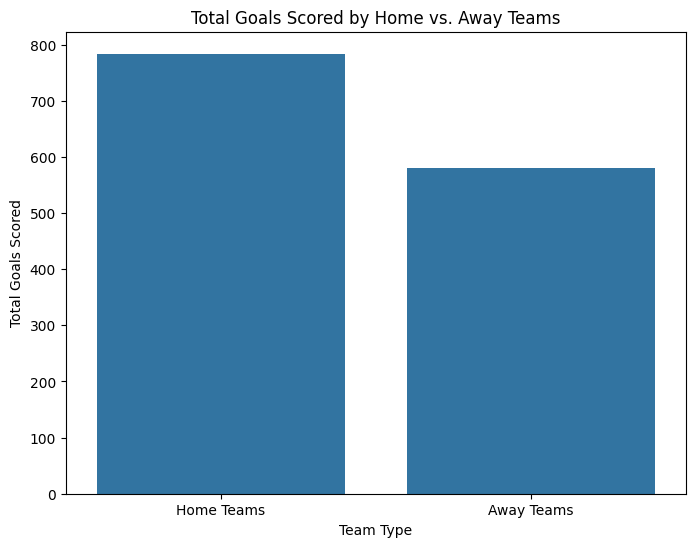

In [7]:
# Assuming 'FTHG' and 'FTAG' columns indicate Full-Time Home Goals and Full-Time Away Goals, respectively
total_home_goals = matches_df['FTHG'].sum()
total_away_goals = matches_df['FTAG'].sum()

# Creating the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Home Teams', 'Away Teams'], y=[total_home_goals, total_away_goals])
plt.title('Total Goals Scored by Home vs. Away Teams')
plt.xlabel('Team Type')
plt.ylabel('Total Goals Scored')
plt.show()

### Home vs. Away Team Performance

- **Home Field Advantage**: The data shows that home teams win more frequently than away teams, highlighting a significant home-field advantage in La Liga.
- **Outcome Trends**: Losses are slightly more common than draws, indicating a tendency towards decisive outcomes in matches.


## Data Cleaning and Preprocessing

First, we will clean the data by removing betting-related features, as they might introduce bias and are not directly related to match outcomes. 

We'll also handle missing values to ensure the integrity of our analysis.

Then, we'll proceed with preprocessing, which includes encoding categorical variables (like team names) and normalizing numerical variables (like goals scored). 

These steps are crucial for preparing the data for effective machine learning, as they help in standardizing the dataset and making it suitable for modeling algorithms.


In [8]:
from sklearn.preprocessing import LabelEncoder

# List of betting-related fields to be removed
betting_fields = [
    "B365>2.5", "B365<2.5", "P>2.5", "P<2.5", "Max>2.5", "Max<2.5", "Avg>2.5", "Avg<2.5", "AHh",
    "B365AHH", "B365AHA", "PAHH", "PAHA", "MaxAHH", "MaxAHA", "AvgAHH", "AvgAHA",
    "B365CH", "B365CD", "B365CA", "BWCH", "BWCD", "BWCA", "IWCH", "IWCD", "IWCA",
    "PSCH", "PSCD", "PSCA", "WHCH", "WHCD", "WHCA", "VCCH", "VCCD", "VCCA",
    "MaxCH", "MaxCD", "MaxCA", "AvgCH", "AvgCD", "AvgCA",
    "B365C>2.5", "B365C<2.5", "PC>2.5", "PC<2.5", "MaxC>2.5", "MaxC<2.5", "AvgC>2.5", "AvgC<2.5",
    "AHCh", "B365CAHH", "B365CAHA", "PCAHH", "PCAHA", "MaxCAHH", "MaxCAHA", "AvgCAHH", "AvgCAHA"
]

# Remove betting-related fields
data_cleaned = data.drop(columns=betting_fields)

# Convert team names to numerical format using Label Encoding
encoder = LabelEncoder()
data_cleaned['HomeTeam'] = encoder.fit_transform(data_cleaned['HomeTeam'])
data_cleaned['AwayTeam'] = encoder.fit_transform(data_cleaned['AwayTeam'])
data_cleaned['HomeTeamName'] = encoder.fit_transform(data_cleaned['HomeTeamName'])
data_cleaned['AwayTeamName'] = encoder.fit_transform(data_cleaned['AwayTeamName'])

# Create a binary outcome feature for home team wins
data_cleaned['HomeWin'] = (data_cleaned['FTR'] == 'H').astype(int)

# Now remove columns that are no longer needed
data_cleaned = data_cleaned.drop(columns=['Div', 'Date', 'Time', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR'])

## Splitting the Dataset

The dataset will be split into a training set and a testing set. 

This is a standard practice in machine learning, allowing us to train our model on one set of data (training set) and then test its performance on a separate set (testing set). 

This approach helps in evaluating the model's ability to generalize to new, unseen data. 

The ratio of the split is crucial and is chosen to balance between adequate training and a robust evaluation of the model's performance.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Handling missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(data_cleaned.drop(['HomeWin'], axis=1))
y = data_cleaned['HomeWin'].values

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

#  Initial Model Training and Evaluation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the validation set
y_pred = rf_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)


## Model Training and Evaluation

This code initializes a Random Forest Classifier, trains it on the training set, and evaluates its performance on the validation set using accuracy, precision, recall, and F1 score.


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the validation set
y_pred = rf_model.predict(X_val)

# Calculate initial evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

After training the initial Random Forest Classifier model, we evaluate its performance using metrics like accuracy, precision, recall, and F1 score. 

These metrics help understand how well the model performs on the validation set.

In [12]:
# Printing the evaluation metrics for the initial model
print("Initial Model Test Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Initial Model Test Results:
Accuracy: 0.66
Precision: 0.61
Recall: 0.64
F1 Score: 0.62


# Model Improvement with Hyperparameter Tuning

The following code refines the Random Forest model through hyperparameter tuning to improve its predictive performance.

These steps complete the process of building and optimizing a machine learning model for predicting home team wins in La Liga matches. 

The model's performance is assessed through various metrics, and hyperparameter tuning is applied to achieve better results.

In [13]:
from sklearn.model_selection import GridSearchCV

# Define a simpler parameter grid for hyperparameter tuning
simple_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize and perform GridSearchCV
simple_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                                  param_grid=simple_param_grid, 
                                  cv=3, 
                                  n_jobs=-1, 
                                  verbose=2)
simple_grid_search.fit(X_train, y_train)

# Best parameters found
simple_best_params = simple_grid_search.best_params_

# Train the model with the best parameters
simple_best_rf_model = RandomForestClassifier(**simple_best_params, random_state=42)
simple_best_rf_model.fit(X_train, y_train)

# Predictions and evaluation of the optimized model
y_pred_simple_best = simple_best_rf_model.predict(X_val)
accuracy_simple_best = accuracy_score(y_val, y_pred_simple_best)
precision_simple_best = precision_score(y_val, y_pred_simple_best)
recall_simple_best = recall_score(y_val, y_pred_simple_best)
f1_simple_best = f1_score(y_val, y_pred_simple_best)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_split=2, n_est

In [14]:
# Printing the evaluation metrics for the improved model
print("\nImproved Model Test Results:")
print(f"Accuracy: {accuracy_simple_best:.2f}")
print(f"Precision: {precision_simple_best:.2f}")
print(f"Recall: {recall_simple_best:.2f}")
print(f"F1 Score: {f1_simple_best:.2f}")


Improved Model Test Results:
Accuracy: 0.65
Precision: 0.60
Recall: 0.64
F1 Score: 0.62


In [15]:
import joblib

# Assuming your model is named 'model' and your encoder is named 'encoder'
joblib.dump(rf_model, 'real_madrid_model.pkl')
joblib.dump(encoder, 'team_name_encoder.pkl')

['team_name_encoder.pkl']

# Performance Metrics

- **Accuracy**: Both models show similar accuracy, with the initial model slightly outperforming the improved model (0.66 vs. 0.65). This indicates that both models are nearly equally capable of correctly predicting whether the home team will win.
**Precision**: Precision is marginally higher in the initial model (0.61 vs. 0.60). This suggests that the initial model, while slightly, was more accurate in predicting positive instances of home team wins.
- **Recall**: The recall is the same for both models (0.64). This means that both models are equally good at identifying all relevant instances of home team wins.
- F1 Score: The F1 Score, which balances precision and recall, is identical for both models (0.62). This indicates a balanced performance between precision and recall in both cases.

# Interpretation and Conclusions
**Hyperparameter Tuning Impact**: The hyperparameter tuning did not significantly improve the model's performance in this case. This could be due to various factors such as the nature of the dataset, the choice of model, the range of hyperparameters selected for tuning, or the complexity of the underlying patterns in the data.

**Model's Predictive Capability**: Both models demonstrate moderate predictive capabilities. While they can predict home team wins to a certain extent, there is room for improvement. This suggests that either the features used might not capture all the nuances influencing the game outcomes, or that a different modeling approach might be required.

**Future Steps for Improvement:**

**Feature Engineering**: Investigating and incorporating more relevant features or transforming existing features could enhance the model's predictive power.

**Alternative Models**: Experimenting with different machine learning algorithms, such as Gradient Boosting or Neural Networks, might yield better results.

**Advanced Hyperparameter Tuning**: A more extensive and thorough hyperparameter tuning process, possibly using techniques like Random Search or Bayesian Optimization, could help in finding a better set of parameters for the model.

**Model Selection and Evaluatio**n: It's also crucial to consider that Random Forest, while robust, might not always be the best choice for every dataset or problem type. 
Evaluating different models and utilizing techniques like cross-validation could provide more insights into the most effective modeling approach for this particular problem.

In conclusion, while the initial model shows a slightly better performance than the improved model, the differences are minimal. 

This suggests that further exploration in terms of features, model selection, and advanced tuning techniques might be necessary to achieve significant improvements in predicting home team wins in La Liga matches.